###Research Question
 You have hourly website traffic data for a week. Analyze:
 * Which day of the week had the highest average traffic?
 * Are there noticeable traffic patterns throughout the day? Task:
 * Group the data by day of the week and calculate the average traffic.
 * Create a heatmap or line plots to visualize traffic patterns over time.
 * Identify peak traffic hours.

### Data Source:
Kaggle (Web Traffic Dataset uploaded by Ramin Huseyn)

### Description:
The dataset contains information about web requests to a single website. It's a time series dataset, which means it tracks data over time, making it great for machine learning analysis.

### Downloading the Dataset

In [ ]:
!kaggle datasets download raminhuseyn/web-traffic-time-series-dataset

Dataset URL: https://www.kaggle.com/datasets/raminhuseyn/web-traffic-time-series-dataset
License(s): CC0-1.0
  0% 0.00/14.4k [00:00<?, ?B/s]
100% 14.4k/14.4k [00:00<00:00, 26.5MB/s]


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import datetime

Extracting the file from Zip format

In [ ]:
from zipfile import ZipFile
file_name = "/content/web-traffic-time-series-dataset.zip"
with ZipFile(file_name, "r") as zip:
  zip.extractall()


### Loading the Dataset using Pandas Library

In [ ]:
df = pd.read_csv("/content/web_traffic.csv")

In [ ]:
df

,Timestamp,TrafficCount
0,2020-01-20 00:00:00,487.0
1,2020-01-20 00:30:00,385.0
2,2020-01-20 01:30:00,269.0
3,2020-01-20 02:30:00,517.0
4,2020-01-20 03:30:00,129.0
...,...,...
2788,2020-05-17 08:30:00,521.0
2789,2020-05-17 09:30:00,1003.0
2790,2020-05-17 10:30:00,1442.0
2791,2020-05-17 11:30:00,1334.0


### Data cleaning and preprocessing

In [ ]:
df.size

5586

There are 5586 total observations

In [ ]:
df.shape

(2793, 2)

The dataset contains 2 columns and 2793 rows

In [ ]:
df.columns

Index(['Timestamp', 'TrafficCount'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     2793 non-null   object 
 1   TrafficCount  2793 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.8+ KB


Traffic count column is numerical while timestamp is an object

In [ ]:
df.describe()

,TrafficCount
count,2793.000000
mean,8591.321160
std,11478.605594
min,22.000000
25%,713.000000
50%,2418.000000
75%,14356.000000
max,71925.000000


There might be presence of outliers in TrafficCount column, because the median and 75th percentile are very low when compared to it's maximum value

In [ ]:
df.isnull().sum()

,0
Timestamp,0
TrafficCount,0


There are no missing values in the dataset

### EDA

### Task 1
* Which day of the week had the highest average traffic?
Are there noticeable traffic patterns throughout the day?
Group the data by day of the week and calculate the average traffic

### Grouping the data by day of the week and Hour

In [ ]:
# CONVERTING TIMESTAMP TO PANDAS DATETIME
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [ ]:
# TO GET DAY OF THE WEEK
df['weekday'] = df['Timestamp'].dt.day_name()


In [ ]:
# TO GET HOURS
df['hour'] = df['Timestamp'].dt.hour

#### Dislaying the data for the new columns weekday and hour created


In [ ]:
df.head(30)

,Timestamp,TrafficCount,weekday,hour
0,2020-01-20 00:00:00,487.0,Monday,0
1,2020-01-20 00:30:00,385.0,Monday,0
2,2020-01-20 01:30:00,269.0,Monday,1
3,2020-01-20 02:30:00,517.0,Monday,2
4,2020-01-20 03:30:00,129.0,Monday,3
5,2020-01-20 04:30:00,278.0,Monday,4
6,2020-01-20 05:30:00,435.0,Monday,5
7,2020-01-20 06:30:00,277.0,Monday,6
8,2020-01-20 07:30:00,1082.0,Monday,7
9,2020-01-20 08:30:00,3432.0,Monday,8


### Calculating average traffic

In [ ]:
mean_traffic_by_day = df.groupby('weekday')['TrafficCount'].mean().sort_values(ascending=False)
mean_traffic_by_day

,TrafficCount
weekday,
Monday,12449.476923
Tuesday,11839.284974
Wednesday,11567.053922
Thursday,11164.639706
Friday,10866.161765
Saturday,1116.783251
Sunday,1056.746770


 "Monday" had the highest average traffic with 12449.47 mean Traffic Count

### TASK 1.1
* Observing Noticeable patterns throughout  Monday

In [ ]:
# Selecting Rows with Only Monday
monday_data = df[df['weekday'] == 'Monday']

In [ ]:
# Displaying the datafor only monday
monday_data

,Timestamp,TrafficCount,weekday,hour
0,2020-01-20 00:00:00,487.0,Monday,0
1,2020-01-20 00:30:00,385.0,Monday,0
2,2020-01-20 01:30:00,269.0,Monday,1
3,2020-01-20 02:30:00,517.0,Monday,2
4,2020-01-20 03:30:00,129.0,Monday,3
...,...,...,...,...
2655,2020-05-11 19:30:00,13853.0,Monday,19
2656,2020-05-11 20:30:00,8070.0,Monday,20
2657,2020-05-11 21:30:00,6687.0,Monday,21
2658,2020-05-11 22:30:00,4184.0,Monday,22


In [ ]:
# # Grouping hour by monday and calculating average monday hourly traffic
monday_hourly_traffic= monday_data.groupby('hour')['TrafficCount'].mean().sort_values(ascending = False)
monday_hourly_traffic

,TrafficCount
hour,
11,35360.875000
10,34113.937500
12,29357.375000
13,28442.500000
14,25980.062500
9,24021.437500
15,23587.500000
16,20895.812500
17,17547.750000


The highest and lowest traffic count is 11am(35360.88) and 3am(171.87) respectively

### TASK 1.2
* Barchart of Monday Hourly Traffic

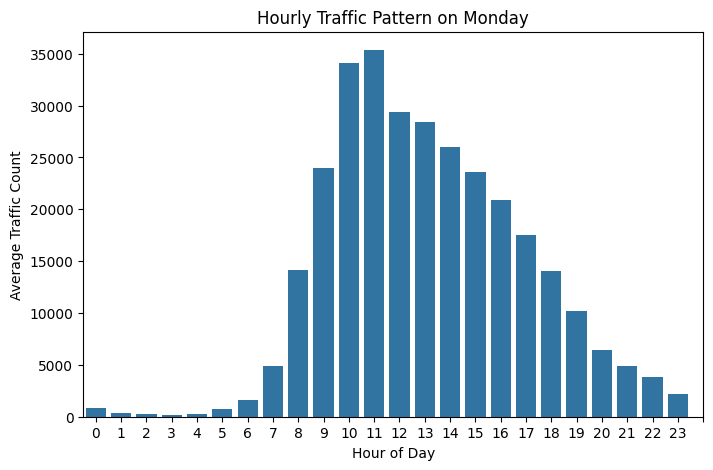

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=monday_hourly_traffic.index, y=monday_hourly_traffic.values)
plt.title('Hourly Traffic Pattern on Monday')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Count')
plt.xticks(range(0, 25))
plt.show()

From the barchart above there is noticeable pattern in the hourly traffic of Monday. The eleventh hour being the highest with 35360.875000 Traffic Count. Also the distribution is skewed to the right implying very high traffic from about 8am to 7pm on Mondays and low traffic at midnight.

### TASK 2
* Create a heatmap or line plots to visualize traffic patterns over time.

In [ ]:
# Grouping Traffic Count by day and hour
avg_traffic_by_hour = df.groupby(['hour', 'weekday'])['TrafficCount'].mean().reset_index()

In [ ]:
avg_traffic_by_hour

,hour,weekday,TrafficCount
0,0,Friday,1173.588235
1,0,Monday,851.833333
2,0,Saturday,956.588235
3,0,Sunday,399.647059
4,0,Thursday,1067.294118
...,...,...,...
163,23,Saturday,637.235294
164,23,Sunday,1171.642857
165,23,Thursday,2000.352941
166,23,Tuesday,2179.117647


### LINE PLOT TO VISUALIZE TRAFFIC PATTERN OVER TIME

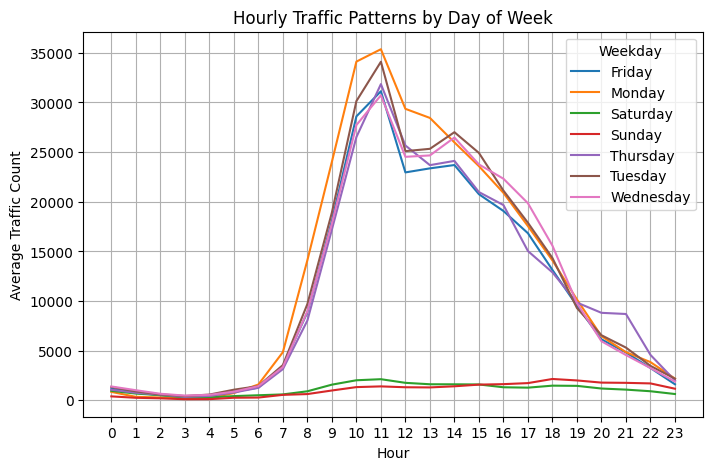

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='hour', y='TrafficCount', hue='weekday', data=avg_traffic_by_hour)
plt.title('Hourly Traffic Patterns by Day of Week')
plt.xlabel('Hour')
plt.ylabel('Average Traffic Count')
plt.xticks(range(0, 24))
plt.legend(title='Weekday')
plt.grid(True)
plt.show()

From the line plot above weekends have very little traffic. Weekdays have higher traffic starting from around 8am and dropping at about 7pm towards 9pm, with Mondays having the overall highest Traffic Count.

### Task 3
* Identify peak traffic hours

In [ ]:
peak_traffic_hours = avg_traffic_by_hour.loc[avg_traffic_by_hour.groupby('weekday')['TrafficCount'].idxmax()]
print("Peak Traffic Hours:")
print(peak_traffic_hours)

Peak Traffic Hours:
     hour    weekday  TrafficCount
77     11     Friday  31128.470588
78     11     Monday  35360.875000
79     11   Saturday   2130.117647
129    18     Sunday   2152.800000
81     11   Thursday  31847.000000
82     11    Tuesday  34098.625000
83     11  Wednesday  30721.117647


For each day of the week, most traffic hour was by 11am except for sunday which is by 6pm. This shows  that most users tend to visit the website more frequently during the mid-morning hours across most weekdays.